<a href="https://colab.research.google.com/github/yonathanarbel/AI-LAW/blob/main/Class_3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tutorial: One-Hot Encoding with Contractual Provisions**

In [ ]:
# Introduction to One-Hot Encoding

# Cell 1 (unchanged)
# Introduction to One-Hot Encoding

print("Welcome to the One-Hot Encoding Tutorial!")
print("One-Hot Encoding is a technique used to represent categorical text data as binary vectors.")
print ("That is, a long list of 0,1,0,0,0,0,1")
print("In this tutorial, you will apply One-Hot Encoding to legal documents.")
print("Let's get started by importing the necessary libraries.")

# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
# P.S. What is importing? To do stuff in python, you often use a function. A function is simple a piece of code someone wrote that does things.
# So when we write print ("Hello"), we are running a function called print. We tell the function inside the paranthesis what is should do
# There are functions like print that are so common, they are automatically imported into python. But other functions need to be imported explicitly.
# In what follows we import for you a bunch of functions


# Define and Execute One-Hot Encoding
# Now, we are also going to create our own function, rather than being lazy and importing something someone else wrote
print("Let's define a function to perform One-Hot Encoding on your contractual provisions.")

# Function to perform one-hot encoding

def one_hot_encode_documents(documents):
    vectorizer = CountVectorizer(binary=True)
    one_hot_matrix = vectorizer.fit_transform(documents).toarray()
    feature_names = vectorizer.get_feature_names_out()
    one_hot_df = pd.DataFrame(one_hot_matrix, columns=feature_names)
    return one_hot_df
#Now, we can use this function. Soon enough you'll see how we put it to use.


#Other house cleaning:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)



In [ ]:
# Provisions

print("Now let's create stuff to encode")
#Here are a few provisions. Please edit them as you see fit.

provisions = [
    "the buyer shall pay the purchase price upon delivery. delivery is by seller not buyer.",
    "the defendant is charged with a felony crime of armed robbery. defendant warrants the he is not guilty ",
    "the seller warrants that the goods are free from defects. The buyer warrants to pay the price.",
    "the State charges the defendant with the commission of a crime. defendant is guilty of being armed during the murder"
]

#up until now, we had a variable that would contain a string. Something like name = "John". or age = 43.
#provisions is a "list"; that is, it is a collection of strings that are listed one after the other.


# Display our provisions
print("\nOur Provisions:")
for i, provision in enumerate(provisions, 1):
    print(f"Provision {i}: {provision}")

In [ ]:
print("Executing One-Hot Encoding...")

# Perform One-Hot Encoding on the uploaded provisions
one_hot_df = one_hot_encode_documents(provisions)

# Display the One-Hot Encoded DataFrame
print("\nOne-Hot Encoded Matrix for Your Provisions:")


# Display the full DataFrame
display(one_hot_df)

# Add a brief explanation
print("\nExplanation:")
print("1 indicates the presence of a word in the provision, 0 indicates its absence.")
print("Each row represents a provision, and each column represents a unique word from all provisions.")

In [ ]:
#Now to the why it matters.
#Our real goal today is to classify provisions. Do they come from a civil case or a criminal case?
#Task 1:
#In your own words, look at the table above. Suppose you were instructing an intern. What are good signs that a provision is civil or criminal?

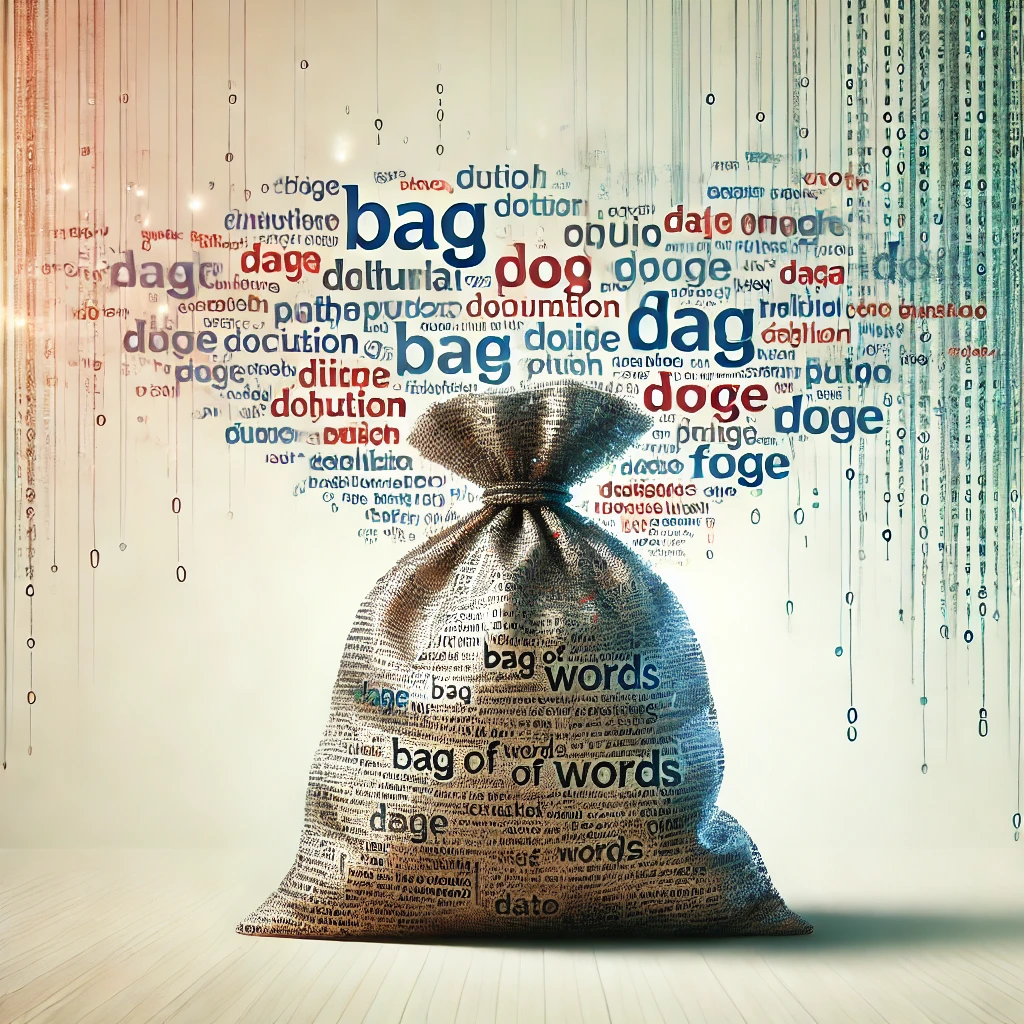

In [ ]:
# One-hot encoding can be hard to work with. While it is a good method to convert words into numbers, it has certain limitations.
# Now, let's introduce the Bag of Words (BoW) model, which addresses some of these limitations.
# Instead of just knowing whether a word appears or not (binary yes/no), we also want to know how OFTEN each word appears in the provisions.



# Display the original provisions
print("Our Provisions:")
for i, provision in enumerate(provisions, 1):
    print(f"Provision {i}: {provision}")

# Create a Bag of Words (BoW) model
print("\nCreating Bag of Words model...")
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(provisions)

# Convert BoW matrix to a DataFrame for better visibility
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the Bag of Words DataFrame
print("\nBag of Words Matrix for Your Contractual Provisions:")
display(bow_df)

# Explanation of BoW
print("\nExplanation:")
print("Each row represents a provision, and each column represents a word from the provisions.")
print("The numbers indicate how many times each word appears in the corresponding provision.")


In [ ]:
#Task
#In your own words, write a test to tell us if a provision is civil or criminal (you can use English or code or a combination)

In [ ]:
# Define new provisions with natural repetition of key words
new_provisions = [
    "The plaintiff, John Doe, seeks damages for breach of contract. The plaintiff argues that the defendant's negligence directly caused the damages claimed in the civil suit. The court must determine if the plaintiff has sufficient evidence to support the claim of breach and negligence.",
    "The defendant is charged with armed robbery and aggravated assault. The prosecution alleges that the defendant committed these crimes on multiple occasions. The criminal court will hear evidence from witnesses who claim to have seen the defendant at the scene of the alleged crimes.",
    "Both parties agree to enter into mediation to resolve the ongoing property dispute. The parties have attempted to negotiate privately but have reached an impasse. The civil court recommends mediation as an alternative to a lengthy trial, encouraging the parties to find a mutually acceptable resolution.",
    "The prosecution bears the burden of proving the defendant's guilt beyond a reasonable doubt in this murder trial. The criminal case hinges on forensic evidence that the prosecution claims links the defendant to the murder scene. The defense argues that the prosecution's case is circumstantial and does not meet the required standard of proof."
]

# One-Hot Encoding
print("\nOne-Hot Encoding:")


one_hot_df = one_hot_encode_documents(new_provisions)
print("\nOne-Hot Encoded Matrix for New Provisions:")
display(one_hot_df)

# Bag of Words
print("\nBag of Words:")

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(new_provisions)
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("\nBag of Words Matrix for New Provisions:")
display(bow_df)

# In your own words, which one would be easier to classify?


In [ ]:
#Stop words.

#Some words are not very informative. We call them stop words and in some cases we remove them.

stop_words = ["an", "heretofore"]

#let's see the same excerise but with stop words removed


# One-Hot Encoding with stop words removed
print("\nOne-Hot Encoding with Stop Words Removed:")

def one_hot_encode_documents_without_stop_words(documents, stop_words):
    vectorizer = CountVectorizer(binary=True, stop_words=stop_words)
    one_hot_matrix = vectorizer.fit_transform(documents).toarray()
    feature_names = vectorizer.get_feature_names_out()
    one_hot_df = pd.DataFrame(one_hot_matrix, columns=feature_names)
    return one_hot_df

one_hot_df_no_stop_words = one_hot_encode_documents_without_stop_words(new_provisions, stop_words)
print("\nOne-Hot Encoded Matrix (Stop Words Removed):")
display(one_hot_df_no_stop_words)

# Bag of Words with stop words removed
print("\nBag of Words with Stop Words Removed:")

vectorizer = CountVectorizer(stop_words=stop_words)
X_no_stop_words = vectorizer.fit_transform(new_provisions)
bow_df_no_stop_words = pd.DataFrame(X_no_stop_words.toarray(), columns=vectorizer.get_feature_names_out())

print("\nBag of Words Matrix (Stop Words Removed):")
display(bow_df_no_stop_words)

#Task:
#edit the stop words list above and remove all the words you think should be removed
#What are same dangers with stop words?



In [ ]:
#Final task on one_hot/ BoW


#Now, write 8 provisions that someone will later classify using only BoW.
#Your goal is to make 3 that will be easily detected as civil, 3 that are easily detected as criminal, and 2 that are VERY confusing to a computer, but not to a human
#Try to keep them realistic

# Define new provisions with natural repetition of key words
new_provisions = [
    "1",
    "2",
    "3",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8"
]

# Create the BoW model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(new_provisions)
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the Bag of Words DataFrame
print("\nBag of Words Matrix for New Provisions:")
display(bow_df)

In [ ]:
#good job!


**Tutorial: TF-IDF with Contractual Provisions**

In [ ]:
# Introduction to TF-IDF

print("Welcome to the TF-IDF Tutorial!")
print("TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to evaluate the importance of a word in a document relative to a collection of documents.")
print("In this tutorial, you will learn how to apply TF-IDF to contractual provisions to identify key terms.")
print("Let's start by importing the necessary libraries.")

# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# TF-IDF: Finding the Needle in the Document Haystack

Imagine you're chasing baddies—terrorists trying to build a chemical weapon. They've hidden one of their dangerous documents among a stack of ordinary papers. You need to find this suspect document quickly.

With BoW, you might look for how often words like 'agent' or 'vial' appear, but it's likely to flag a lot of irrelevant documents. You might end up reading about real estate agents selling houses with vial-shaped vases. Last thing you want to read about now! If you knew exactly what you were looking for, like "cyanide," it would've been easy. But you don't. You just need to find the document that is different from the rest.

This is where TF-IDF comes to the rescue. Let's break it down:

1. TF (Term Frequency): This is similar to BoW. It tells us how often a word appears in a document. If "bleach" appears 3 times in a 100-word document, its TF would be 3/100 = 0.03.

2. IDF (Inverse Document Frequency): This is the secret sauce. In simple words, IDF means "how rare is this word among all the documents in our stack?" It's typically calculated using logarithms to balance the scores.

3. TF-IDF: We multiply TF and IDF together. This gives us a "rarity score" for each word in each document.

Here's a simple example:

| Word    | TF   | IDF  | TF-IDF |
|---------|------|------|--------|
| the     | 0.05 | 0.1  | 0.005  |
| bleach  | 0.03 | 2.5  | 0.075  |
| house   | 0.02 | 1.0  | 0.020  |

Notice how "bleach" has a much higher TF-IDF score than "the" or "house", even though its TF is lower. This is because it's a rarer word across all documents.

Back to our case: suppose we find a document with a really high TF-IDF score for "bleach". Now we're suspicious. It could be because this document talks about bleach a lot, or because bleach is a rare word in our document stack and this document mentions it. We know that bleach may be related to various chemical stuff (that's about as far as our knowledge of chemistry goes), so we flag this document. CASE SOLVED!

By using TF-IDF, we've found our needle in the document haystack, without having to become chemical weapons experts ourselves!

In [ ]:
# Define and Execute TF-IDF

print("Now, let's define a function to perform TF-IDF ")

# Function to perform TF-IDF encoding
def tfidf_encode_documents(documents):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents).toarray()
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix, columns=feature_names)
    return tfidf_df





In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

print("Our goal now is to figure out whether a sentence, taken out of a contract, is a non-compete or an NDA")

contractual_provisions = [
    "Employee shall not, during Employee's employment with Employer and for a period of [twelve (12) months] following the termination of Employee's employment, whether such termination is voluntary or involuntary and regardless of the reason for the termination, [in any geographic region for which Employee had direct or indirect responsibility on behalf of Employer,] perform duties or services for a Direct Competitor, whether as an employee, consultant, principal, advisor, board member, or any other capacity, that are substantially similar to the duties or services Employee performed for Employer at any time during the last [twelve (12) months] of Employee's employment with Employer, or that require Employee to use, disclose, or otherwise take advantage of any Proprietary Information obtained in the course of Employee's employment with Employer. For purposes of this section, a Direct Competitor means any entity that offers or plans to offer products or services that are materially competitive with any of the products or services being manufactured, offered, marketed, or are being actively developed by Employer as of the date Employee's employment with Employer ends.",

    "the Executive agrees that he/she will not, while employed by the Company during the Term hereof and for a period of one year thereafter (or, in the event of the Company's termination of the Executive without cause or if the Executive's employment is terminated by him/her for Good Reason (as defined herein) or by the Company within six months before or within twenty-four (24) months after a Change of Control (as defined herein), for such longer period during which the Executive is receiving compensation pursuant to the provisions of Section 8 hereof), directly or indirectly, engage in (whether as an officer, employee, consultant, director, proprietor, agent, partner or otherwise) or have an ownership interest in, or participate in the financing, operation, management or control of, any person, firm, corporation or business engaged in competition with the Company, any of its affiliates, its parent or subsidiaries in the business of manufacture or sale of printed circuit boards, backpanels, backplanes and/or box build assembly products, or in the development of technology for such businesses; provided, however, that these restrictions shall only apply to the Executive's activities post-termination of employment with persons, firms, corporations or businesses with annual gross revenues in a competing business, as defined herein, (in the aggregate with its affiliated entities) in excess of one hundred million United States dollars. It is agreed that ownership of no more than 4.9% of the outstanding voting stock of a publicly traded corporation shall not constitute a violation of this provision. In recognition of the fact that the Company's business is global, the territory to which the restrictions contained in this Section 5(a) shall apply shall be worldwide.",

    "For a period of two (2) years following the termination of employment with the Company, the Employee shall not, directly or indirectly, own, manage, operate, control, be employed by, participate in, or be connected in any manner with the ownership, management, operation, or control of any business similar to the type of business conducted by the Company or any of its affiliates within a 100-mile radius of any office or facility owned or operated by the Company or its affiliates.",

    "During the term of this Agreement and for a period of eighteen (18) months thereafter, the Consultant agrees not to engage in any activity that competes with the Company's business, including but not limited to providing services to any person or entity that is engaged in a business similar to or competitive with the Company's business, without the prior written consent of the Company.",

    "The Recipient agrees to hold all Confidential Information in strict confidence and not to disclose such Confidential Information to any third parties. The Recipient shall use the Confidential Information solely for the purpose of evaluating the potential business relationship and not for any other purpose. The Recipient shall take all reasonable measures to protect the secrecy of and avoid disclosure or use of Confidential Information in order to prevent it from falling into the public domain or the possession of persons other than those persons authorized to have any such information.",

    "Employee acknowledges that during the course of employment, he/she will have access to and become acquainted with various trade secrets and confidential information belonging to the Company, including but not limited to, customer lists, financial information, marketing strategies, and proprietary technologies. Employee agrees at all times during or after employment to hold in the strictest confidence, and not to use or disclose to any person, firm, or corporation, any of the Company's confidential information except in furtherance of the Company's business."
]

def tfidf_encode_documents(documents):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    feature_names = vectorizer.get_feature_names_out()

    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    return tfidf_df, feature_names

# Perform TF-IDF on the uploaded provisions
tfidf_df, feature_names = tfidf_encode_documents(contractual_provisions)

# Display the top 10 highest scoring words for each sentence
for i, provision in enumerate(contractual_provisions):
    print(f"\nTop 10 highest score words for sentence #{i+1}:")
    top_words = tfidf_df.iloc[i].nlargest(10)
    for word, score in top_words.items():
        print(f"{word}: {score:.4f}")

In [ ]:
#that failed misreably.

#Task: explain why.



In [ ]:
#another attempt

# Define a list of stop words
stop_words = ['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', '100']


def tfidf_encode_documents(documents, stop_words):
    vectorizer = TfidfVectorizer(stop_words=stop_words)
    tfidf_matrix = vectorizer.fit_transform(documents)
    feature_names = vectorizer.get_feature_names_out()

    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    return tfidf_df, feature_names

# Perform TF-IDF on the uploaded provisions with stop words removed
tfidf_df, feature_names = tfidf_encode_documents(contractual_provisions, stop_words)

# Display the top 10 highest scoring words for each sentence
for i, provision in enumerate(contractual_provisions):
    print(f"\nTop 10 highest score words for sentence #{i+1}:")
    top_words = tfidf_df.iloc[i].nlargest(10)
    for word, score in top_words.items():
        print(f"{word}: {score:.4f}")
# Create a heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df.iloc[:, :20], annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('TF-IDF Scores Heatmap (Top 20 Terms)')
plt.xlabel('Terms')
plt.ylabel('Sentences')
plt.tight_layout()
plt.show()
#Task: keep editing the stop word until you are happy, and then explain how to know whether a sentence is a non compete or an NDA
#your answer should include your stop words and the rule(s)

**Tutorial: Lemmatization and Stop Words Removal**

In [ ]:
# Introduction to preprocessing: Lemmatization

print("Welcome to the Lemmatization Tutorial!")
print("Lemmatization reduces words to their base or root form.")
print ("Both stop word removal (which we now master) and lemmatizations are forms of so called 'text pre-processing'")
print("These preprocessing steps help in normalizing text and focusing on substantive legal terms.")
print("Let's start by importing the necessary libraries and setting up our environment.")

# Import necessary libraries
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources
#(This time, we will use a store bough list of stop words, instead of generating one of our own. It's just easier, but can sometimes get us in trouble)
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
# Example contractual provisions for demonstration
contractual_provisions = [
    "The buyer shall pay the purchase price upon delivery.",
    "The seller warrants that the goods are free from defects.",
    "The parties agree to resolve any disputes through arbitration.",
    "The contract shall be governed by the laws of the State of New York."
]

# Display the uploaded provisions
print("\nUploaded Contractual Provisions:")
for i, provision in enumerate(contractual_provisions, 1):
    print(f"Provision {i}: {provision}")

In [ ]:
# Define and Execute Text Preprocessing

print("Now, let's define a function to preprocess your contractual provisions by removing stop words and lemmatizing.")

# Function to preprocess text (removing stop words and lemmatizing)
def preprocess_legal_text(text):
    stop_words = set(stopwords.words('english')) #remove those pesky stopwords
    lemmatizer = WordNetLemmatizer() #lemmatize words
    words = text.split()
    # Remove stop words
    words = [word for word in words if word.lower() not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to each provision
processed_provisions = [preprocess_legal_text(provision) for provision in contractual_provisions]

# Display the processed provisions
print("\nProcessed Contractual Provisions (Stop Words Removed, Lemmatized):")
for i, provision in enumerate(processed_provisions, 1):
    print(f"Provision {i}: {provision}")

In [ ]:
# Analysis and Explanation

print("You've successfully preprocessed your contractual provisions!")
print("Let's analyze the output to understand the effect of stop words removal and lemmatization.")

# Display the original and processed provisions side by side for comparison
print("\nComparison of Original and Processed Provisions:")
for i, (original, processed) in enumerate(zip(contractual_provisions, processed_provisions), 1):
    print(f"\nOriginal Provision {i}: {original}")
    print(f"Processed Provision {i}: {processed}")

print("\nExplanation:")
print("Stop words like 'the','be' are removed because they do not add significant meaning.")
print("Lemmatization reduces words to their base form, e.g., 'warrants' becomes 'warrant'.")
print("These preprocessing steps help in focusing on substantive terms and reducing noise in legal text analysis.")
print("\nTry modifying your provisions and re-running the cells to see how the preprocessing changes the text!")

In [ ]:
# Visualize Common Terms Before and After Preprocessing

from collections import Counter
import matplotlib.pyplot as plt

print("Let's visualize the most common terms before and after preprocessing.")

# Function to count word frequencies
def count_word_frequencies(text_list):
    all_words = ' '.join(text_list).split()
    word_counts = Counter(all_words)
    return word_counts

# Count word frequencies before and after preprocessing
original_word_counts = count_word_frequencies(contractual_provisions)
processed_word_counts = count_word_frequencies(processed_provisions)

# Convert counts to DataFrames for easy plotting
original_df = pd.DataFrame(original_word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
processed_df = pd.DataFrame(processed_word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot the most common terms before preprocessing
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(original_df['Word'][:10], original_df['Frequency'][:10], color='blue')
plt.title('Top 10 Terms Before Preprocessing')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')

# Plot the most common terms after preprocessing
plt.subplot(1, 2, 2)
plt.bar(processed_df['Word'][:10], processed_df['Frequency'][:10], color='green')
plt.title('Top 10 Terms After Preprocessing')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\nExplanation:")
print("The bar charts show the most frequent terms in the contractual provisions before and after preprocessing.")
print("Notice how common terms ('the', 'of', etc.) are removed after preprocessing, and substantive terms ('buyer', 'shall', etc.) become more prominent.")
print("\nFeel free to experiment with different contractual provisions and see how the preprocessing affects the term frequencies!")

**Exercises**

In [ ]:
# Exercise 1: One-Hot Encoding

# Upload your own set of contractual provisions
#find on the internet or draft your own contractual provisions. Make them of two types (e.g., NDA and non compete, or compensation and bonus pay)

contractual_provisions_ex1 = [
    "The buyer must inspect the goods upon receipt and notify the seller of any defects within ten days.",
    "The seller warrants that the goods conform to the specifications provided in the contract.",
    "Any disputes arising from this contract shall be resolved through mediation.",
    "The contract shall be governed by the laws of the State of California."
]


# Perform One-Hot Encoding
one_hot_df_ex1 = one_hot_encode_documents(contractual_provisions_ex1)
print("\nOne-Hot Encoded Matrix for Your New Contractual Provisions:")
print(one_hot_df_ex1)

# Analyze the Matrix
print("\nAnalysis Questions:")
print("1. Which terms appear in multiple provisions?")
print("2. Which terms are unique to specific provisions?")

In [ ]:
# Exercise 2: TF-IDF Analysis



# Perform TF-IDF Analysis
tfidf_df_ex2 = tfidf_encode_documents(contractual_provisions_ex1)
print("\nTF-IDF Matrix for Your New Contractual Provisions:")
print(tfidf_df_ex2)

# Analyze the TF-IDF Scores
print("\nAnalysis Questions:")
print("1. Which terms have the highest TF-IDF scores in each provision?")
print("2. How does the significance of similar terms compare across different provisions?")

In [ ]:
# Exercise 3: Lemmatization and Stop Words Removal


# Apply Preprocessing
processed_provisions_ex3 = [preprocess_legal_text(provision) for provision in contractual_provisions_ex3]
print("\nProcessed Contractual Provisions (Stop Words Removed, Lemmatized):")
for i, provision in enumerate(processed_provisions_ex3, 1):
    print(f"Provision {i}: {provision}")

# Analyze the Impact of Preprocessing
print("\nAnalysis Questions:")
print("1. How does preprocessing affect the readability and focus of the text?")
print("2. What are the key substantive terms after preprocessing?")

**Questions**

1. How does One-Hot Encoding represent text data numerically? What are its advantages and disadvantages in handling legal documents?

2. What does TF-IDF measure, and why is it useful for identifying significant terms in a document? How does it differ from simple term frequency?

3. What are the main weaknesses of using One-Hot Encoding for large legal corpora? Can you think of any ways to mitigate these weaknesses?

4. How might TF-IDF scores be misleading in the context of legal texts, especially when analyzing a small corpus or very short documents?

5. In what scenarios might removing stop words or lemmatizing terms lead to a loss of critical information in legal documents? Provide an example.

6. Discuss the ethical implications of using NLP techniques. Can we rely on the rules that we developed for classification? What might go wrong?

7. How could you use NLP techniques to analyze changes in legal language over time (e.g., shifts in the use of certain legal terms or phrases)? What challenges might you face in such an analysis?

8. Why does the number of rows in the One-Hot Encoded matrix always match the number of documents? How would adding more documents change the matrix?

9. Can you think of examples where a term might have a high TF-IDF score but not be particularly "important" to understanding a legal document?

